In [1]:
import sys
sys.path.append('../..')

import eeg_decoder 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
plt.clf()

experiment_name = 'C01'
data_dir = f'./data/{experiment_name}'

exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1000])
erp = eeg_decoder.ERP(exp,subtitle=experiment_name)
xdata_all, ydata_all = erp.load_all_eeg()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 640x480 with 0 Axes>

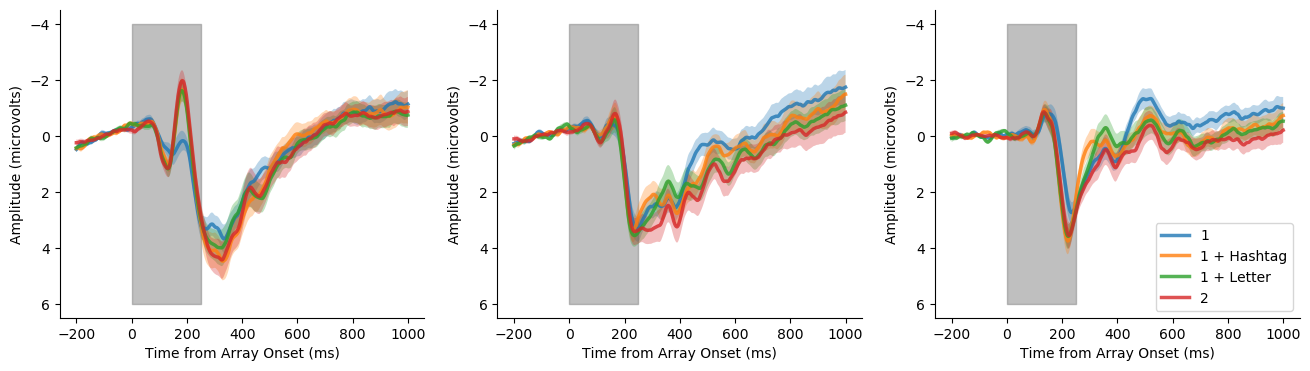

In [3]:
fig,axes = plt.subplots(1,3,figsize=(16,4),sharex=True,sharey=True)
for isubset,(subtitle,subset) in enumerate(zip(['Parietal-Occipital','Central','Frontal'],[('P','O'),('C'),('F')])):
    erp.plot_ss(
        xdata_all, ydata_all,
        ax = axes[isubset], 
        electrode_subset=subset,
        condition_subset=[11,12,13,20],
        condition_labels=['1','1 + Hashtag','1 + Letter','2'])
axes[isubset].legend(loc='lower right')

plt.savefig('output/figures/erps.png',dpi=500,bbox_inches='tight')
plt.savefig('output/figures/erps.pdf',dpi=500,bbox_inches='tight')
plt.show()